# FIGURE 3.1 Least Squares Fit

In [1]:
# import section 
import matplotlib  
import matplotlib.pyplot as pyplot # alias namespace to global
import seaborn
import numpy
import pandas 
import sklearn

from sklearn.linear_model import LinearRegression # direct import of class object
import statsmodels


In [23]:
advertisingDataFrame: pandas.DataFrame = pandas.read_csv ("../islr-data/Advertising.csv")
advertisingDataFrame = advertisingDataFrame.iloc [:, 1:5]
advertisingDataFrame.head (5)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [24]:
advertisingDataFrame.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [25]:
# compute the correlation matrix of the variables in the data frame
advertisingDataFrame.corr ()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [37]:
numpy.ones_like (correlationMatrix, dtype = numpy.bool)
numpy.tril (numpy.ones_like (correlationMatrix, dtype = numpy.bool))

array([[ True, False, False, False],
       [ True,  True, False, False],
       [ True,  True,  True, False],
       [ True,  True,  True,  True]])

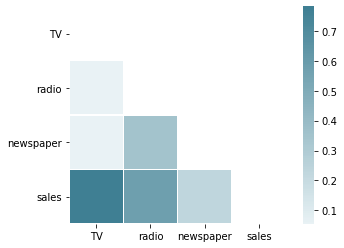

In [39]:
correlationMatrix = advertisingDataFrame.corr ()
upperTriangleMask = numpy.triu (numpy.ones_like (correlationMatrix, dtype = numpy.bool))
colorMap = seaborn.diverging_palette (10, 220, as_cmap = True)
seaborn.heatmap (correlationMatrix, mask = upperTriangleMask, cmap = colorMap, center = 0, square = True, linewidths = 0.5)


This visualization is a simple linear regression of Sales by TV with the residuals and their distance from the regressed line shown. 

To fit the object, our `X` parameter can be a matrix, but our `y` parameter must be a vector. We will reshape the data frame to setup the `X` and `y` values. We are not splitting the data into train/test sets or using any k-fold or cross-validation. This will fit the complete data set. 

In [4]:
advertisingTV = advertisingDataFrame ["TV"].values.reshape (-1, 1) # leave as multi-dimension matrix
advertisingSales = advertisingDataFrame ["sales"].values.reshape (-1, 1).ravel () # convert to single dimension vector

The linear regression model for scikit-learn is `sklearn.linear_model.LinearRegression` (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [5]:
# fit the intercept B_0 (fit_intercept = True)
# do not normalize the predictor variables (X) (normalize = False)
# fit sales = B_0 + B_1 * TV

linearRegression = LinearRegression (fit_intercept = True, normalize = False, copy_X = True, n_jobs = None)
fit = linearRegression.fit (X = advertisingTV, y = advertisingSales)
fit_r2 = fit.score (advertisingTV, advertisingSales)

# an equivalent R might be 
# linearRegression = lm (advertisingSales ~ advertisingTV) 

In [6]:
# let's list out the coefficients from the fit 
print ("B_0 intercept: {:.3f}".format (fit.intercept_))
print ("B_1 : {:.3f}".format (fit.coef_[0]))
print ("R-squared : {:.3f}".format (fit_r2))


B_0 intercept: 7.033
B_1 : 0.048
R-squared : 0.612


In [138]:
# using the statsmodel library so that we can get the p-values 
# and compare the sklearn approach to the statsmodel approach
model = statsmodels.formula.api.ols ("sales ~ TV", data = advertisingDataFrame).fit ()
model.summary ()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 30 May 2020   Prob (F-statistic):           1.47e-42
Time:                        19:56:47   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

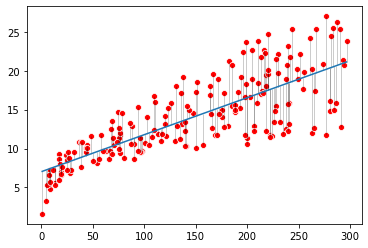

In [158]:
# create a scatterplot, add the regression line, and add the residual differences

predictedValues = fit.predict (advertisingTV).ravel ()

seaborn.scatterplot (x = advertisingTV.ravel (), y = advertisingSales, color = "r")
seaborn.lineplot (x = advertisingTV.ravel (), y = predictedValues)

# slow loop, there is most likely a quicker implementation
for index in range (0, len (advertisingSales)):
    linePointsX = []
    linePointsX.append (float (advertisingTV [index]))
    linePointsX.append (float (advertisingTV [index]))
    linePointsY = []
    linePointsY.append (float (advertisingSales [index]))
    linePointsY.append (float (predictedValues [index]))
    seaborn.lineplot (x = linePointsX, y = linePointsY, color = "k")
